expectation of the empirical spectrial distribution: -0.2
variance of the empirical spectral distribution: 800.54608

expectation of the *scaled* empirical spectral distribution: 9.094947017729283e-17
variance of the *scaled* empirical spectral distribution: 1.0008827765553108


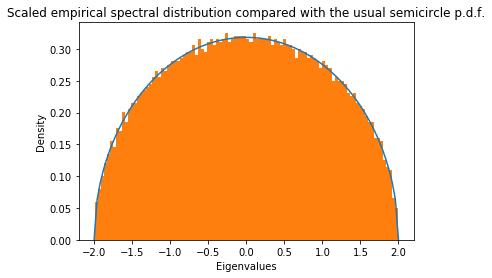

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n = 5*10**3
p = 0.2

#create B
B = np.random.binomial(1, p, size=(n,n))
np.fill_diagonal(B, 0)
upper_triangle = np.triu(B)
B = (upper_triangle + upper_triangle.T)

#create E
E = np.ones((n, n))

A = B - p * E
eigenvalues = np.linalg.eigvalsh(A)

#use the scaling we derived, and it's histogram should look like the usual semicircle pdf
scaled_eigenvalues = (eigenvalues + p) / np.sqrt(n - 1) / np.sqrt(p * (1-p))

empirical_expectation = np.sum(eigenvalues) / n
empirical_variance = (1 - 2 * p) / n * np.sum(B) + p * p * (n - 1)

print('expectation of the empirical spectrial distribution: {}'.format(empirical_expectation))
print('variance of the empirical spectral distribution: {}'.format(empirical_variance))
print()

scaled_empirical_expectation = np.sum(scaled_eigenvalues) / n
scaled_empirical_variance = np.sum(np.square(scaled_eigenvalues - scaled_empirical_expectation)) / n
print('expectation of the *scaled* empirical spectral distribution: {}'.format(scaled_empirical_expectation))
print('variance of the *scaled* empirical spectral distribution: {}'.format(scaled_empirical_variance))

x = np.linspace(-2, 2, 100)
plt.plot(x, 1 / (2*np.pi) * np.sqrt(4 - np.square(x)))
plt.hist(scaled_eigenvalues, density=True, bins=100)
plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Scaled empirical spectral distribution compared with the usual semicircle p.d.f.')
plt.show()